# Deep Learning: Image Classification for Cifar10 dataset

Although the dataset is effectively solved, it can be used as the basis for learning and practicing how to develop, evaluate, and use convolutional deep learning neural networks for image classification.

**Objective:**<br />

- In this notebook, I will implement all the functions required to build a deep learning model to clasify imagens into 10 categories. It is a good way to learn how ConvNet can be used.

**After this code:**<br />

- I'll have a trained model to image classification ('airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck'). For this, I used mainly `keras` package.


Let's get started!

## 1 - Packages

Let's first import all the packages that you will need during this code.

- **pandas** is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool, built on top of the Python programming language.
- **numPy** is a Python library used for working with arrays. It also has functions for working in domain of linear algebra, fourier transform, and matrices.
- **matplotlib** is a comprehensive library for creating static, animated, and interactive visualizations in Python.
- **seaborn** is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.
- **scikit-learn** is a free machine learning library for Python.
- **tensorFlow** is a Python library for fast numerical computing created and released by Google. It is a foundation library that can be used to create Deep Learning models directly or by using wrapper libraries that simplify the process built on top of TensorFlow.
- **keras** is a powerful and easy-to-use free open source Python library for developing and evaluating deep learning models.

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
import tensorflow as tf
from keras.datasets import cifar10
from keras.models import Sequential, load_model
from keras import layers, regularizers
from keras.callbacks import ModelCheckpoint
#from keras.optimizers import SGD

## 2 - Import data

cifar10
The [CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html) dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Downloading data from https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
# 170500096/170498071 [==============================] - 68s 0us/step

In [3]:
print("Train Dataset: {}".format(X_train.shape))
print("Test Dataset:  {}".format(X_test.shape))

classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
print('Classes: {}'.format(classes))

Train Dataset: (50000, 32, 32, 3)
Test Dataset:  (10000, 32, 32, 3)
Classes: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


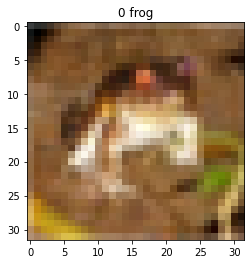

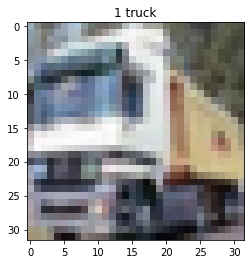

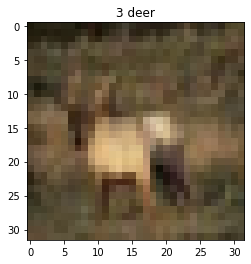

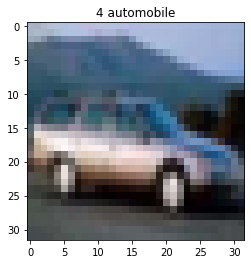

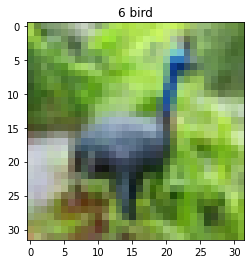

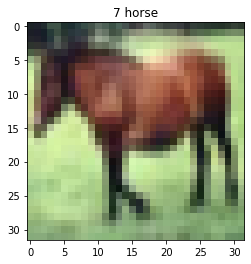

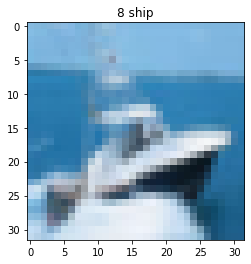

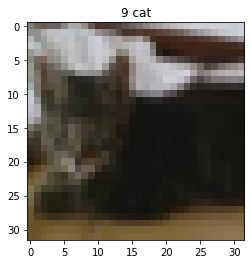

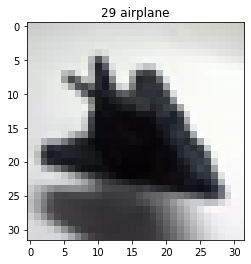

In [4]:
# Plot few images
for i in [0,1,3,4,6,7,8,9,29]: #range(100):
    plt.title(str(i) + ' ' + classes[y_train[i][0]]) # plot title
    plt.imshow(X_train[i]) # plot raw pixel data
    plt.show() # show the figure
    
# It is clear that the images are indeed very small. This low resolution is likely
# the cause of the limited performance that top-of-the-line algorithms are able to achieve on the dataset.

## 3 - Preprocessing data

In [5]:
# One hot encoding for the class element
y_train_cat = tf.keras.utils.to_categorical(y_train)
y_test_cat = tf.keras.utils.to_categorical(y_test)

# rescale all pixels
X_train_scale = X_train/255.
X_test_scale  = X_test/255.

## 4 - Deep Learning

This [post](https://shaoanlu.wordpress.com/2017/05/29/sgd-all-which-one-is-the-best-optimizer-dogs-vs-cats-toy-experiment/) reviewing an article claiming SGD is a better generalized adapter than ADAM.

But I will still use ADAM for this task.

In [24]:
def model_definition(input_data):
    X = Sequential()
    
    # 2D convolution layer (e.g. spatial convolution over images).
    # This layer creates a convolution kernel that is convolved with the layer input to produce a tensor of outputs.
    X.add(layers.Conv2D(32, (3, 3), activation='relu',
                        kernel_initializer='he_uniform',
                        padding='same',
                        kernel_regularizer=regularizers.l2(0.001),
                        input_shape=input_data.shape[1:]))
    
    # Downsamples the input representation by taking the maximum value
    # over the window defined by `pool_size` for each dimension along the features axis.
    X.add(layers.MaxPooling2D((2, 2)))
    
    # Normalize the activations of the previous layer at each batch, i.e. applies a transformation that maintains
    # the mean activation close to 0 and the activation standard deviation close to 1.
    #X.add(layers.BatchNormalization())
    
    X.add(layers.Conv2D(32, (3, 3), activation='relu',
                        kernel_initializer='he_uniform',
                        padding='same',
                        kernel_regularizer=regularizers.l2(0.001)))
    
    X.add(layers.Conv2D(64, (3, 3),
                        activation='relu',
                        kernel_initializer='he_uniform',
                        padding='same',
                        kernel_regularizer=regularizers.l2(0.001)))
    
    X.add(layers.Conv2D(128, (3, 3),
                        activation='relu',
                        kernel_initializer='he_uniform',
                        padding='same',
                        kernel_regularizer=regularizers.l2(0.001)))
    
    # Downsamples the input representation by taking the maximum value
    # over the window defined by `pool_size` for each dimension along the features axis.
    X.add(layers.MaxPooling2D((2, 2)))

    # The Dropout layer randomly sets input units to 0 with a frequency of `rate`
    # at each step during training time, which helps prevent overfitting.
    X.add(layers.Dropout(0.5))
    
    X.add(layers.Flatten())
        
    # Just your regular densely-connected NN layer.
    X.add(layers.Dense(128, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=regularizers.l2(0.001)))
    X.add(layers.Dense(10, activation='softmax'))
    
    # Compile model
    #optim = SGD(lr=0.001, momentum=0.9)
    #X.compile(optimizer=optim, loss='categorical_crossentropy', metrics=['accuracy'])
    X.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return X

In [27]:
model = model_definition(X_train_scale)
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 16, 16, 32)        9248      
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 8, 8, 128)        

In [59]:
X_train_scale.shape[1:]

(32, 32, 3)

In [28]:
%%time
# Implementing model checkpoins to save the best metric and do not lose it on training.
checkpoint1 = ModelCheckpoint("01_Models/cifar10_best_model_ConvNet.hdf5",
                              monitor='val_accuracy',
                              verbose=1,
                              save_best_only=True,
                              mode='auto',
                              period=1,
                              save_weights_only=False)
history1 = model.fit(X_train_scale, y_train_cat,
                     batch_size=32,
                     epochs=50,
                     validation_data=(X_test_scale, y_test_cat),
                     callbacks=[checkpoint1])

Epoch 1/50
1562/1563 [============================>.] - ETA: 0s - loss: 1.7835 - accuracy: 0.4801
Epoch 00001: val_accuracy improved from -inf to 0.58650, saving model to 01_Models\cifar10_best_model_ConvNet.hdf5
1563/1563 [==============================] - 114s 73ms/step - loss: 1.7834 - accuracy: 0.4801 - val_loss: 1.4541 - val_accuracy: 0.5865
Epoch 2/50
1562/1563 [============================>.] - ETA: 0s - loss: 1.4140 - accuracy: 0.6048
Epoch 00002: val_accuracy improved from 0.58650 to 0.64140, saving model to 01_Models\cifar10_best_model_ConvNet.hdf5
1563/1563 [==============================] - 112s 72ms/step - loss: 1.4142 - accuracy: 0.6048 - val_loss: 1.3139 - val_accuracy: 0.6414
Epoch 3/50
1562/1563 [============================>.] - ETA: 0s - loss: 1.3102 - accuracy: 0.6458
Epoch 00003: val_accuracy improved from 0.64140 to 0.67310, saving model to 01_Models\cifar10_best_model_ConvNet.hdf5
1563/1563 [==============================] - 113s 72ms/step - loss: 1.3103 - accura

Epoch 26/50
1562/1563 [============================>.] - ETA: 0s - loss: 1.0249 - accuracy: 0.7651
Epoch 00026: val_accuracy did not improve from 0.77840
1563/1563 [==============================] - 117s 75ms/step - loss: 1.0250 - accuracy: 0.7651 - val_loss: 1.0307 - val_accuracy: 0.7679
Epoch 27/50
1563/1563 [==============================] - ETA: 0s - loss: 1.0185 - accuracy: 0.7672
Epoch 00027: val_accuracy did not improve from 0.77840
1563/1563 [==============================] - 117s 75ms/step - loss: 1.0185 - accuracy: 0.7672 - val_loss: 0.9983 - val_accuracy: 0.7783
Epoch 28/50
1563/1563 [==============================] - ETA: 0s - loss: 1.0176 - accuracy: 0.7690
Epoch 00028: val_accuracy improved from 0.77840 to 0.78270, saving model to 01_Models\cifar10_best_model_ConvNet.hdf5
1563/1563 [==============================] - 114s 73ms/step - loss: 1.0176 - accuracy: 0.7690 - val_loss: 0.9970 - val_accuracy: 0.7827
Epoch 29/50
1562/1563 [============================>.] - ETA: 0s - 

## 5 - Best model evaluation

In [29]:
%%time
# Let's load the best model obtained during training
best_model = load_model("01_Models/cifar10_best_model_ConvNet.hdf5")

y_train_pred = best_model.predict(X_train_scale)
y_test_pred = best_model.predict(X_test_scale)

Wall time: 39.1 s


In [30]:
# Classification Report
print("Classification Report - Train")
print("Train accuracy score:", metrics.accuracy_score(y_train_cat.argmax(axis=1), np.around(y_train_pred, decimals=0).argmax(axis=1)))
print(metrics.classification_report(y_train_cat.argmax(axis=1), np.around(y_train_pred, decimals=0).argmax(axis=1)))

print("Classification Report - Test")
print("Test accuracy score:", metrics.accuracy_score(y_test_cat.argmax(axis=1), np.around(y_test_pred, decimals=0).argmax(axis=1)))
print(metrics.classification_report(y_test_cat.argmax(axis=1), np.around(y_test_pred, decimals=0).argmax(axis=1)))

Classification Report - Train
Train accuracy score: 0.77108
              precision    recall  f1-score   support

           0       0.37      0.94      0.53      5000
           1       0.95      0.92      0.93      5000
           2       0.86      0.68      0.76      5000
           3       0.94      0.33      0.49      5000
           4       0.89      0.75      0.81      5000
           5       0.77      0.73      0.75      5000
           6       0.93      0.81      0.87      5000
           7       0.96      0.77      0.86      5000
           8       0.96      0.88      0.92      5000
           9       0.94      0.90      0.92      5000

    accuracy                           0.77     50000
   macro avg       0.86      0.77      0.78     50000
weighted avg       0.86      0.77      0.78     50000

Classification Report - Test
Test accuracy score: 0.7286
              precision    recall  f1-score   support

           0       0.35      0.92      0.50      1000
           1   

,Pred_airplane,Pred_automobile,Pred_bird,Pred_cat,Pred_deer,Pred_dog,Pred_frog,Pred_horse,Pred_ship,Pred_truck
True_airplane,916,6,13,2,4,0,0,3,33,23
True_automobile,53,891,1,0,0,1,3,0,9,42
True_bird,265,0,616,2,29,47,26,6,4,5
True_cat,427,2,30,283,31,155,43,12,8,9
True_deer,208,2,35,3,687,20,17,24,3,1
True_dog,224,1,20,8,18,710,3,11,1,4
True_frog,150,5,23,7,11,12,786,1,4,1
True_horse,206,0,21,1,23,25,0,718,0,6
True_ship,116,15,6,1,0,2,1,2,843,14
True_truck,84,64,1,0,1,2,2,3,7,836


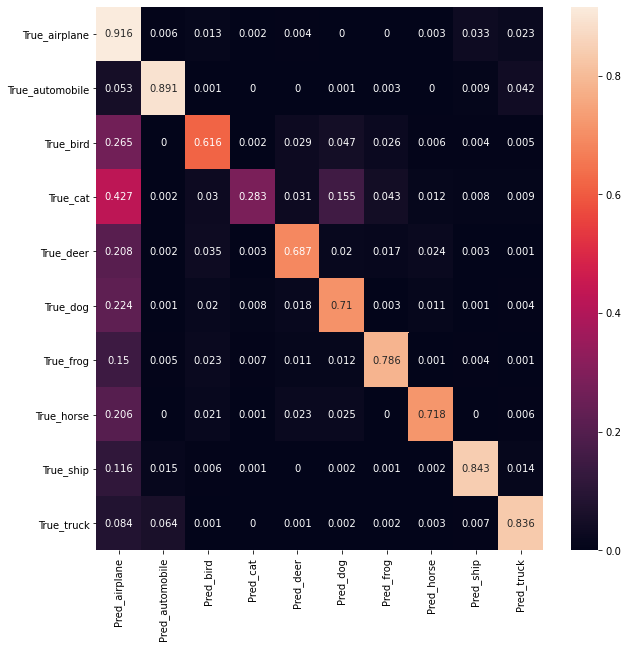

In [31]:
# Create a confusion matrix
cm_result = pd.DataFrame(metrics.confusion_matrix(y_test_cat.argmax(axis=1), np.around(y_test_pred, decimals=0).argmax(axis=1)),
                         index=['True_{}'.format(x) for x in classes],
                         columns=['Pred_{}'.format(x) for x in classes])

display(cm_result)

plt.figure(figsize = (10,10))
sns.heatmap(cm_result.astype('float') / cm_result.sum(axis=1).values[:, np.newaxis],
            annot=True, fmt='g', annot_kws={"size": 10})
plt.show()

## 6 - Examples

=======> True: (id=250) dog


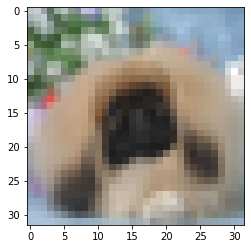

=======> Prediction: 250 dog


In [86]:
i=250 # Define ID of the testset

print('=======> True: (id={}) {}'.format(i,classes[y_test[i][0]]))
plt.imshow(X_test[i]) # plot raw pixel data
plt.show() # show the figure


id_pred = np.around(best_model.predict(X_test_scale[i].reshape(1, 32, 32, 3)), decimals=0).argmax(axis=1)
print('=======> Prediction: {}'.format(str(i) + ' ' + classes[id_pred[0]]))

=======> True: (id=3567) frog


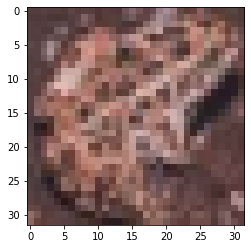

=======> Prediction: 3567 frog


In [87]:
i=3567 # Define ID of the testset

print('=======> True: (id={}) {}'.format(i,classes[y_test[i][0]]))
plt.imshow(X_test[i]) # plot raw pixel data
plt.show() # show the figure


id_pred = np.around(best_model.predict(X_test_scale[i].reshape(1, 32, 32, 3)), decimals=0).argmax(axis=1)
print('=======> Prediction: {}'.format(str(i) + ' ' + classes[id_pred[0]]))

=======> True: (id=6789) automobile


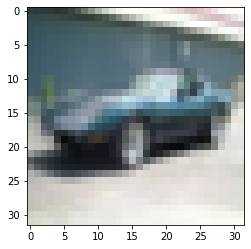

=======> Prediction: 6789 automobile


In [88]:
i=6789 # Define ID of the testset

print('=======> True: (id={}) {}'.format(i,classes[y_test[i][0]]))
plt.imshow(X_test[i]) # plot raw pixel data
plt.show() # show the figure


id_pred = np.around(best_model.predict(X_test_scale[i].reshape(1, 32, 32, 3)), decimals=0).argmax(axis=1)
print('=======> Prediction: {}'.format(str(i) + ' ' + classes[id_pred[0]]))

=======> True: (id=897) horse


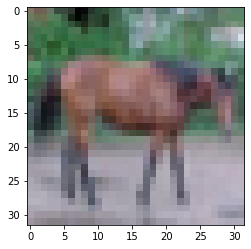

=======> Prediction: 897 horse


In [90]:
i=897 # Define ID of the testset

print('=======> True: (id={}) {}'.format(i,classes[y_test[i][0]]))
plt.imshow(X_test[i]) # plot raw pixel data
plt.show() # show the figure


id_pred = np.around(best_model.predict(X_test_scale[i].reshape(1, 32, 32, 3)), decimals=0).argmax(axis=1)
print('=======> Prediction: {}'.format(str(i) + ' ' + classes[id_pred[0]]))

---------------------